In [2]:
pip install pygame

     ---------------------------------------- 8.4/8.4 MB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pygame

pygame 2.1.2 (SDL 2.0.18, Python 3.10.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [12]:
pygame.init()
window = pygame.display.set_mode((500, 150))
clock = pygame.time.Clock()

In [13]:
font = pygame.font.SysFont(None, 100)
#text = font.render('Hello World', False, (255, 0, 0))
text = font.render('Hello World', True, (255, 0, 0))

In [14]:
background = pygame.Surface(window.get_size())
ts, w, h, c1, c2 = 50, *window.get_size(), (128, 128, 128), (64, 64, 64)
tiles = [((x*ts, y*ts, ts, ts), c1 if (x+y) % 2 == 0 else c2) for x in range((w+ts-1)//ts) for y in range((h+ts-1)//ts)]
for rect, color in tiles:
    pygame.draw.rect(background, color, rect)
run = True

In [ ]:
while run:
    clock.tick(60)
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            run = False

    window.blit(background, (0, 0))
    window.blit(text, text.get_rect(center = window.get_rect().center))
    pygame.display.flip()
pygame.quit()

In [ ]:
import cv2
import numpy as np
import scipy
from scipy import signal
import math


In [5]:
pip install opencv-python

     ---------------------------------------- 35.6/35.6 MB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scipy

     ---------------------------------------- 40.1/40.1 MB 5.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Collecting matplotlib
     ---------------------------------------- 7.2/7.2 MB 6.1 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 163.6/163.6 kB 4.9 MB/s eta 0:00:00



  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
x = np.arange(500) / 500 - 0.5
y = np.arange(500) / 500 - 0.5

X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
f0 = 10
k = 250
a = np.sin(np.pi * 2 * (f0 * R + k * R**2 / 2))

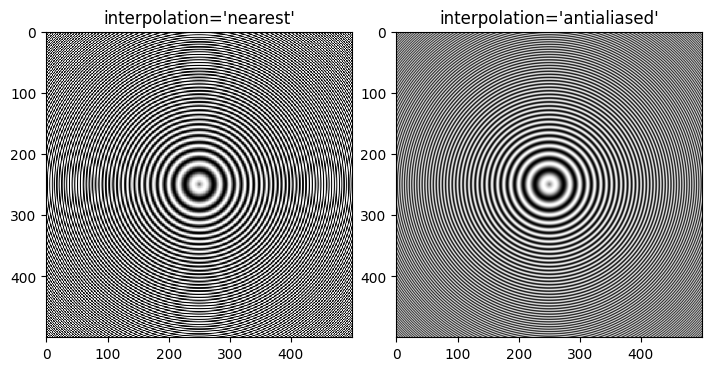

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(7, 4), constrained_layout=True)
for ax, interp in zip(axs, ['nearest', 'antialiased']):
    ax.imshow(a, interpolation=interp, cmap='gray')
    ax.set_title(f"interpolation='{interp}'")
plt.show()

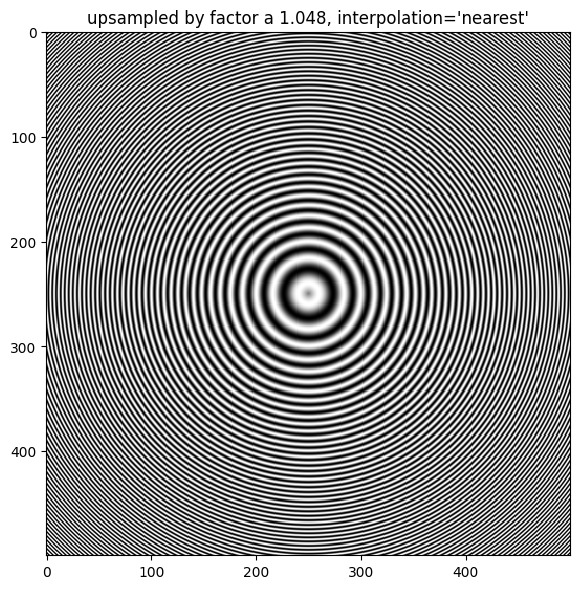

In [27]:
fig, ax = plt.subplots(figsize=(6.8, 6.8))
ax.imshow(a, interpolation='nearest', cmap='gray')
ax.set_title("upsampled by factor a 1.048, interpolation='nearest'")
plt.show()

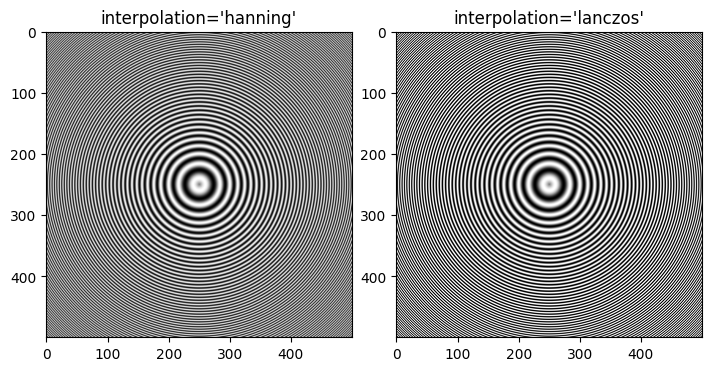

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(7, 4), constrained_layout=True)
for ax, interp in zip(axs, ['hanning', 'lanczos']):
    ax.imshow(a, interpolation=interp, cmap='gray')
    ax.set_title(f"interpolation='{interp}'")
plt.show()

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
N = 450
x = np.arange(N) / N - 0.5
y = np.arange(N) / N - 0.5
aa = np.ones((N, N))
aa[::2, :] = -1

X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
f0 = 5
k = 100
a = np.sin(np.pi * 2 * (f0 * R + k * R**2 / 2))
# make the left hand side of this
a[:int(N / 2), :][R[:int(N / 2), :] < 0.4] = -1
a[:int(N / 2), :][R[:int(N / 2), :] < 0.3] = 1
aa[:, int(N / 3):] = a[:, int(N / 3):]
a = aa

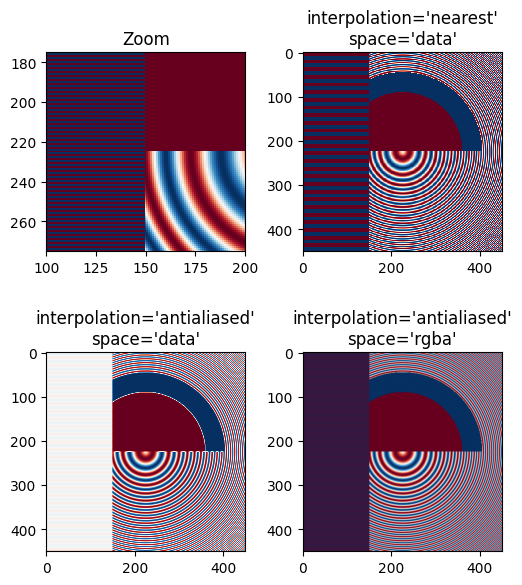

In [37]:
fig, axs = plt.subplots(2, 2, figsize=(5, 6), constrained_layout=True)
axs[0, 0].imshow(a, interpolation='nearest', cmap='RdBu_r')
axs[0, 0].set_xlim(100, 200)
axs[0, 0].set_ylim(275, 175)
axs[0, 0].set_title('Zoom')

for ax, interp, space in zip(axs.flat[1:],
                             ['nearest', 'antialiased', 'antialiased'],
                             ['data', 'data', 'rgba']):
    ax.imshow(a, interpolation=interp, interpolation_stage=space,
              cmap='RdBu_r')
    ax.set_title(f"interpolation='{interp}'\nspace='{space}'")
plt.show()

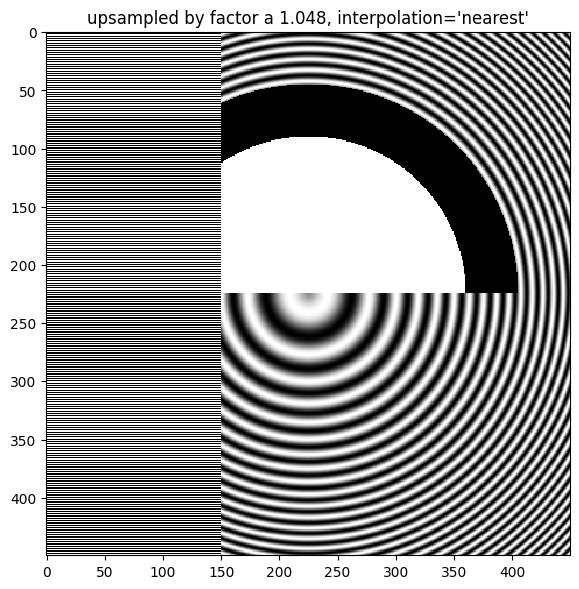

In [38]:
fig, ax = plt.subplots(figsize=(6.8, 6.8))
ax.imshow(a, interpolation='nearest', cmap='gray')
ax.set_title("upsampled by factor a 1.048, interpolation='nearest'")
plt.show()

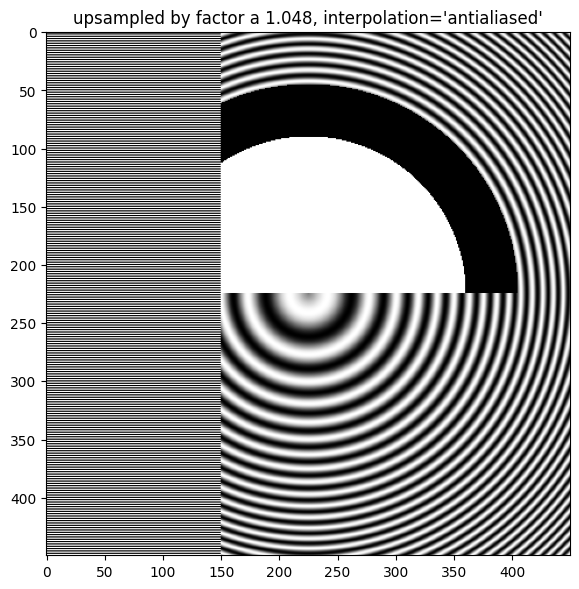

In [39]:
fig, ax = plt.subplots(figsize=(6.8, 6.8))
ax.imshow(a, interpolation='antialiased', cmap='gray')
ax.set_title("upsampled by factor a 1.048, interpolation='antialiased'")
plt.show()

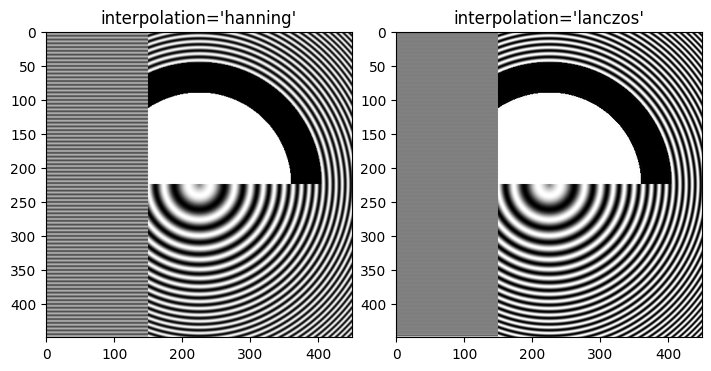

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(7, 4), constrained_layout=True)
for ax, interp in zip(axs, ['hanning', 'lanczos']):
    ax.imshow(a, interpolation=interp, cmap='gray')
    ax.set_title(f"interpolation='{interp}'")
plt.show()